# Štatistická práca
Patrik Broček

## Úvod

V mojej štatistickej práci budem analyzovať dáta o nakupovaní v supermarketoch získané z : https://www.kaggle.com/datasets/mehmettahiraslan/customer-shopping-dataset. Dáta však **nie sú plne realistické**, pretože pre každý jednotlivý **nákup** je v datasete uvedená iba **jedna zakúpená položka**, jej množstvo a cena. Z tohto dôvodu budem celý čas uvažovať len svet v ktorom sa dá v obchode kúpiť iba jedna položka a všetky závery ktoré odvodím budú platné len v pod touto podmienkou.


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from prettytable import PrettyTable

data = pd.read_csv("dataset/supermarket/archive/customer_shopping_data_parsed.csv")
print(data.head())

   gender  age   category payment_method     total
0  Female   28   Clothing           Card   7502.00
1    Male   21      Shoes           Card   5401.53
2    Male   20   Clothing           Cash    300.08
3  Female   66      Shoes           Card  15004.25
4  Female   49  Cosmetics           Cash     40.66


## Ženy míňajú na nákupoch viac ako muži

Nemám potuchy čo s tým, ale šak nejak to skúsim nehehe

In [34]:
males = data[data["gender"] == "Male"]
females = data[data["gender"] == "Female"]

+---------+--------------------+-------------------+------+--------+--------+--------------------+---------+--------+
|  count  |        mean        |        std        | min  |  25%   |  50%   |        75%         |   max   | gender |
+---------+--------------------+-------------------+------+--------+--------+--------------------+---------+--------+
| 39975.0 | 2534.0502371482175 | 4216.352328763888 | 5.23 | 130.75 | 600.17 | 2700.7200000000003 | 26250.0 |  male  |
| 39975.0 | 2498.821610006254  | 4187.396113572586 | 5.23 | 130.75 | 600.17 | 2700.7200000000003 | 26250.0 | female |
+---------+--------------------+-------------------+------+--------+--------+--------------------+---------+--------+


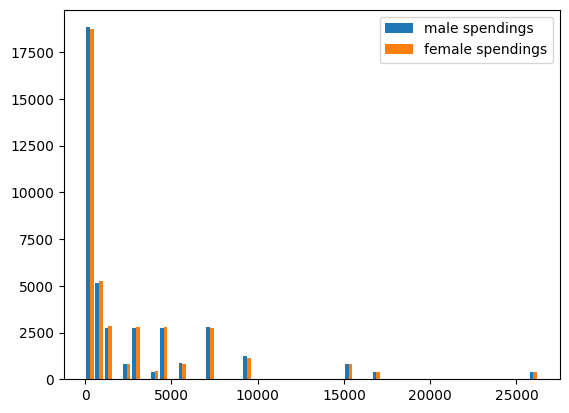

In [35]:
# Graph
bins = np.linspace(data["total"].min(), data["total"].max(), 50)
plt.hist([males["total"], females["total"]], bins, label=["male spendings", "female spendings"])
plt.legend(loc='upper right')

# Table
table = PrettyTable(); table.field_names = males["total"].describe().index
table.add_row(males["total"].describe().values)
table.add_row(females["total"].describe().values)
table.add_column("gender", ["male", "female"])
print(table)

Z histogramu a aj z tabuľky to zatiaľ vyzerá, že by sme hypotézu mohli ľahko vyvrátiť. Zároveň však histogram vyzerá, že dáta s ktorými pracujem nie sú normálne distribuované. Toto ešte overím pomocou knižnice : <br>

$ H_0 $  Dáta sú normálne distribuované <br>
$ H_1 $  Dáta nie sú normálne distribuované <br>
$ \alpha = 0.05 $  

In [36]:
_, p = stats.normaltest(data["total"])
print("p value is : ", p)

p value is :  0.0


$ p $ hodnota je oveľa menšia ako $ \alpha $ takže nulovú hypotézu môžem zamietnuť. Dáta teda nie sú normálne rozdelené a tak budem musieť použiť neparametrický test.

Aby som zistil, či dáta pochádzajú z rovnakého rozdelenia, vykonám [U-test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test). Pre oba testy mi budú platiť nasledovné hypotézy : <br>

$ H_0 $ : Muži a ženy utrácajú v obchode rovnako <br>
$ H_1 $ : Ženy utrácajú v obchode viac <br>
$ \alpha = 0.05 $

### [U-test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test)

In [37]:
_, p_value = stats.mannwhitneyu(males["total"], females["total"])
print("p_value: ", p_value)

p_value:  0.6378679368451287


$ p $ hodnota je podľa očakávania vyššia ako $ \alpha $ a tak nulovú hypotézu zamietnuť nemôžem.

### [Median test](https://en.wikipedia.org/wiki/Median_test)

Podľa očakávania je $ p $ hodnota vyššia ako požadovaná $ \alpha $ hodnota a tak nemôžem zamietnuť nulovú hypotézu. Týmto som zistil, že dáta útrat mužov a žien pravdepodobne pochádzajú z rovnakej distribúcie. Skúsim vykonať ešte mediánový test, ktorým zistím, či pochádzajú z distribúcií s rovnakým mediánom.

In [38]:
result = stats.median_test(males["total"], females["total"])
print("p value is : ", result.pvalue)

p value is :  0.7182381769504835


Aj podľa tohto testu nemôžeme zamietnuť nulovú hypotézu a teda môžem vyvodiť záver, že muží aj ženy utrácajú v obchode rovnako.

# Mladí ľudia nakupujú kartou viac ako starší

V tejto hypotéze skúsim overiť, či existuje závislosť medzi medzi vekom a spôsobom platby. Konkrétne sa domnievam, že mladí ľudia používajú kartu viac ako starší ľudia. Vek mám v dátach zastúpený celkom uniformne a tak ďalej nijak upravovať nebudem

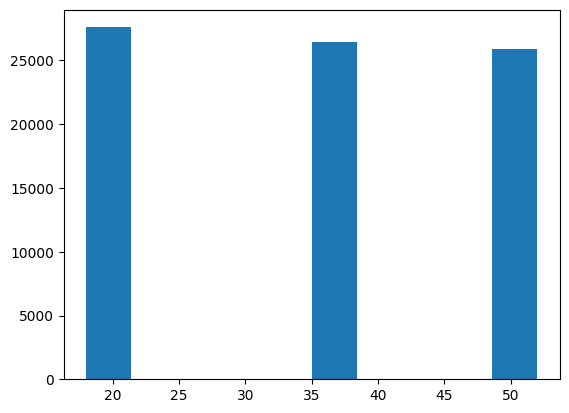

In [76]:
plt.hist(data["age"])
plt.show()

+---------+-------------------+--------------------+------+------+------+------+------+----------------+
|  count  |        mean       |        std         | min  | 25%  | 50%  | 75%  | max  | payment_method |
+---------+-------------------+--------------------+------+------+------+------+------+----------------+
| 44144.0 | 43.46830826386372 | 14.982816172093813 | 18.0 | 30.0 | 43.0 | 56.0 | 69.0 |      card      |
| 35806.0 | 43.43869742501257 | 15.022222463327042 | 18.0 | 30.0 | 43.0 | 56.0 | 69.0 |      cash      |
+---------+-------------------+--------------------+------+------+------+------+------+----------------+


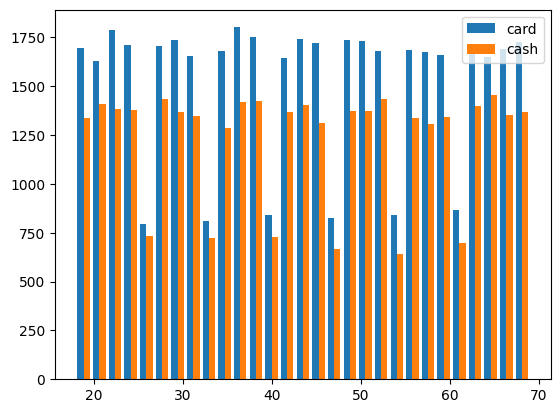

In [41]:
card = data[data["payment_method"] == "Card"]
cash = data[data["payment_method"] == "Cash"]

# Table
table = PrettyTable(); table.field_names = card["age"].describe().index
table.add_row(card["age"].describe().values)
table.add_row(cash["age"].describe().values)
table.add_column("payment_method", ["card", "cash"])
print(table)

# Graph
bins = np.linspace(data["age"].min(), data["age"].max(), 30)
plt.hist([card["age"], cash["age"]], bins, label=["card", "cash"])
plt.legend(loc='upper right')


Z dát je jasne vidno, že platba kartou je populárnejšia ako platba v hotovosti, avšak okrem toho vyzerjú byť dáta rozdelené takmer identicky. Histogram vyzerá tak, že by sme aj túto domnienku mali zamietnuť, pretože pre každú vekovú skupinu je platba kartou nepopulárna o takmer rovnakú hodnotu.

### Chi-kvadrát
Aby som zistil, či sú dáta na sebe skutočne závislé použijem chi-kvadrát test nezávislosti. Ten porovnáva na základe početnosti a tak si dáta najskôr kategorizujem do skupín.


Nulová hypotéza $  H_0 $ : Neexistuje závislosť medzi vekom a spôsobom platby (mladí nakupujú kartou rovnako veľa ako starší) <br>
$ H_1 $ : Existuje závislosť medzi vekom a spôsobom platby <br>
$ \alpha = 5% $ <br>


In [55]:
from ages import categorize_ages
from statistics import median

categories = ["young", "young middle", "old middle" ,"old"]
interval = np.linspace(data["age"].min(), data["age"].max(), len(categories) + 1)
new_data = categorize_ages(interval, data)

In [63]:
# age_counts = new_data["age"].value_counts()
# payment_counts = new_data["payment_method"].value_counts()
# print(age_counts)
# print(payment_counts)

age
18    27598
35    26418
52    25934
Name: count, dtype: int64
payment_method
Card    44144
Cash    35806
Name: count, dtype: int64


In [70]:
crosstab = pd.crosstab(new_data["payment_method"], new_data["age"])
crosstab

age,18,35,52
payment_method,,,
Card,15198,14624,14322
Cash,12400,11794,11612


In [79]:
output = stats.chi2_contingency(crosstab)
output

Chi2ContingencyResult(statistic=0.45121086518228015, pvalue=0.7980329173339661, dof=2, expected_freq=array([[15238.10021263, 14586.56900563, 14319.33078174],
       [12359.89978737, 11831.43099437, 11614.66921826]]))

In [45]:
median(data["age"])

43.0

In [53]:
# neviem = stats.chisquare(card["age"], cash["age"])

35806